# Summarizing cross-section metrics from single lines

Leanne Friedrich 08/02/21

## initialization

In [3]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [4]:
import os
import sys
sys.path.append("../")
from py.config import cfg
import py.logs as logs
import py.metrics as me
from printVals import *
from plainIm import plainIm
import matplotlib.pyplot as plt
import metricPlots as mp
import regression as rg
import matplotlib.cm as cm
LOGGERDEFINED = logs.openLog('vidSummaries.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [5]:
ss,u = me.importStillsSummary(diag=True)

Independents: ['bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh']

Dependents: ['xs_aspect', 'xs_xshift', 'xs_yshift', 'xs_area', 'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'vert_wN', 'vert_hN', 'vert_vN', 'vert_vintegral', 'vert_viN', 'ver

In [38]:
sims,usim = plainIm(r'C:\Users\lmf1\OneDrive - NIST\NIST\data\openfoam\summaries\viscositysweep\summaryTable_x_5_t_2.5.csv', ic=0)

In [46]:
simscone,usimcone = plainIm(r'C:\Users\lmf1\OneDrive - NIST\NIST\data\openfoam\summaries\conicalNozzle\summaryTable_x_5_t_2.5.csv', ic=0)

### cross-section

### aspect ratio

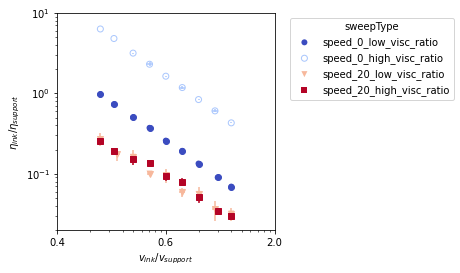

In [400]:
fig, ax=mp.scatterSS(ss[ss.sweepType.str.contains('speed')], 'vRatio', 'viscRatio', 'sweepType', logx=True, logy=True, dx=0, fontsize=10)
# locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
# ax.xaxis.set_minor_locator(locmin)
# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.set_xticks([0.1, 1, 10])
ax.set_yticks([0.1, 1, 10])
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
ax.set_xlabel('$v_{ink}/v_{support}$')
ax.set_ylabel('$\eta_{ink}/\eta_{support}$')
fig.savefig(os.path.join(cfg.path.fig, 'figures', 'vratio viscratio.svg'), bbox_inches='tight', dpi=150)

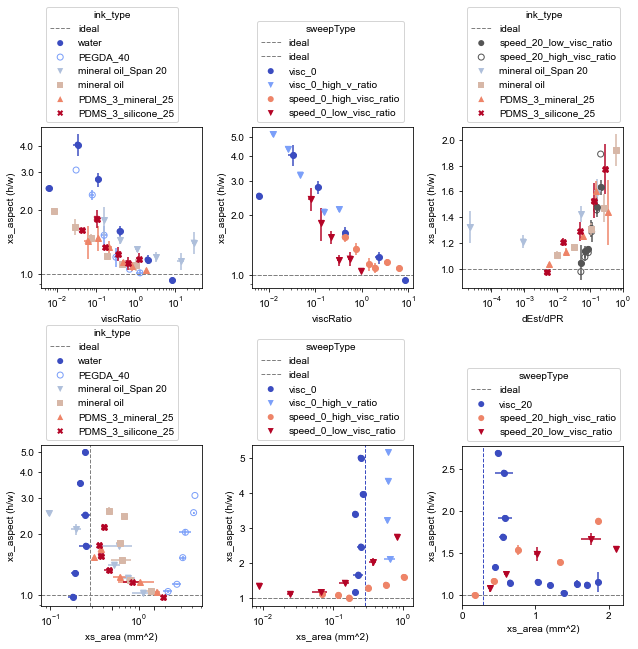

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [67]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0.sort_values(by='sigma')
ss0 = ss0[ss0.xs_aspect_SE<0.5]
ss1 = ss0.copy()
sslap = ss1[ss1.ink_base=='water']
sslap = sslap.sort_values(by='sweepType')
ssca = ss1.copy()
ssmin = ss1[ss1.sigma==20]
ssmin = ssmin.sort_values(by='sweepType')
cmap = cm.get_cmap('coolwarm') 
fig,axs = plt.subplots(2,3,figsize=(9,9))
mp.scatterSS(ss1[ss1.vRatio==1], 'viscRatio', 'xs_aspect', 'ink_type', logx=True, logy=True, gradColor=0, yideal=1, ax=axs[0][0], units=u,  legend=True, fontsize=10, dx=0.2)
mp.sweepTypeSS(sslap, 'viscRatio', 'xs_aspect', logx=True, logy=True, gradColor=0, yideal=1, ax=axs[0][1], units=u, legend=True, dx=0.2)

# dEst
ssca['dEst/dPR'] = ssca['dEst']/ssca['sup_dPR']
mp.scatterSS(ssca[(ssca.sweepType.str.startswith('speed'))&(ssca.sigma>0)], 'dEst/dPR', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, ax=axs[0][2], units=u,  legend=True, dx=0.2, color='#555555')
mp.scatterSS(ssca[ssca.vRatio==1], 'dEst/dPR', 'xs_aspect', 'ink_type', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[0][2], units=u,  legend=True, dx=0.2)

# area aspect
kwargs = {'logx':True, 'logy':True, 'gradColor':0, 'yideal':1,  'units':u, 'legend':True, 'dy':0.2, 'dx':1}
mp.scatterSS(ss0[(ss0.vRatio==1)], 'xs_area', 'xs_aspect',  'ink_type', xideal=(np.pi*(cfg.const.di/2)**2), ax=axs[1][0], **kwargs)

# lap sweep type
mp.sweepTypeSS(sslap[sslap.sweepType.str.startswith('visc')],  'xs_area', 'xs_aspect', dx=1, dy=0.2, logx=True, logy=False, gradColor=0, yideal=1, units=u, legend=True, ax=axs[1][1])
mp.sweepTypeSS(sslap[sslap.sweepType.str.startswith('speed')],  'xs_area', 'xs_aspect', dx=0.2, dy=1, logx=True, logy=False, gradColor=0, yideal=1, units=u, legend=True, ax=axs[1][1])
axs[1][1].axvline((np.pi*(cfg.const.di/2)**2), 0,1, color=cmap(0), linestyle='--', linewidth=1, label='ideal')

# mineral 
mp.sweepTypeSS(ssmin[(ssmin.sweepType.str.startswith('speed'))|((ssmin.sweepType.str.startswith('visc'))&(ssmin.xs_area>1))], 'xs_area', 'xs_aspect', dx=0.2, dy=1, logx=False, logy=False, gradColor=0, yideal=1, units=u, legend=True, ax=axs[1][2])
mp.sweepTypeSS(ssmin[(ssmin.sweepType.str.startswith('visc'))&(ssmin.xs_area<1)],  'xs_area', 'xs_aspect', dx=1, dy=0.2, logx=False, logy=False, gradColor=0, yideal=1,  units=u, legend=False, ax=axs[1][2])
axs[1][2].axvline((np.pi*(cfg.const.di/2)**2), 0,1, color=cmap(0), linestyle='--', linewidth=1, label='ideal')
axs[1][2].set_xticks([0, 1, 2])
axs[1][2].set_xticklabels([0, 1, 2])

fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'figures', 'xs_aspect.svg'), bbox_inches='tight', dpi=300)

get marker 0
0 (0.2298057, 0.298717966, 0.753683153, 1.0)
['visc_0']
get marker 1
1 (0.5543118699137254, 0.6900970112156862, 0.9955155482352941, 1.0)
['visc_0_high_v_ratio']
get marker 0
0 (0.705673158, 0.01555616, 0.150232812, 1.0)
['speed_0_high_visc_ratio']
get marker 1
1 (0.9566532109764706, 0.598033822717647, 0.4773022923529412, 1.0)
['speed_0_low_visc_ratio']
---------------------------------------------


['speed_0_high_visc_ratio' 'speed_0_low_visc_ratio' 'visc_0'
 'visc_0_high_v_ratio']
get marker
0 (0.2298057, 0.298717966, 0.753683153, 1.0)
['speed_0_high_visc_ratio' 'speed_0_low_visc_ratio' 'visc_0'
 'visc_0_high_v_ratio']
get marker
1 (0.6672529243333334, 0.7791764569999999, 0.992959213, 1.0)
['speed_0_high_visc_ratio' 'speed_0_low_visc_ratio' 'visc_0'
 'visc_0_high_v_ratio']
get marker
2 (0.968203399, 0.7208441, 0.6122929913333334, 1.0)
['speed_0_high_visc_ratio' 'speed_0_low_visc_ratio' 'visc_0'
 'visc_0_high_v_ratio']
get marker
3 (0.705673158, 0.01555616, 0.150232812, 1

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c38ed6b448>)

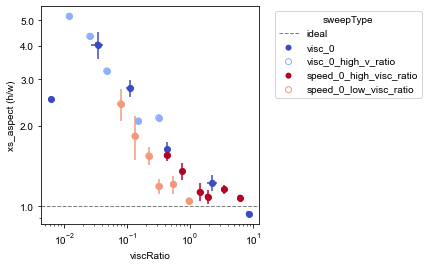

In [ ]:
mp.sweepTypeSS(sslap, 'viscRatio', 'xs_aspect', logx=True, logy=True, gradColor=0, yideal=1,  units=u, legend=True, dx=0.2)
print('---------------------------------------------\n\n')
mp.scatterSS(sslap, 'viscRatio', 'xs_aspect', colorBy='sweepType', logx=True, logy=True, gradColor=0, yideal=1,  units=u, legend=True, dx=0.2)

{'marker': 'o', 'color': (0.2298057, 0.298717966, 0.753683153, 1.0), 'edgecolors': 'none', 'facecolors': (0.2298057, 0.298717966, 0.753683153, 1.0), 'label': 'speed_0_high_visc_ratio'}
{'facecolors': (0.6672529243333334, 0.7791764569999999, 0.992959213, 1.0), 'edgecolors': 'none', 'color': (0.6672529243333334, 0.7791764569999999, 0.992959213, 1.0), 'label': 'speed_0_low_visc_ratio'}
{'marker': 'v', 'color': (0.968203399, 0.7208441, 0.6122929913333334, 1.0), 'edgecolors': 'none', 'facecolors': (0.968203399, 0.7208441, 0.6122929913333334, 1.0), 'label': 'visc_0'}
{'marker': 's', 'color': (0.705673158, 0.01555616, 0.150232812, 1.0), 'edgecolors': 'none', 'facecolors': (0.705673158, 0.01555616, 0.150232812, 1.0), 'label': 'visc_0_high_v_ratio'}


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c3889b1fc8>)

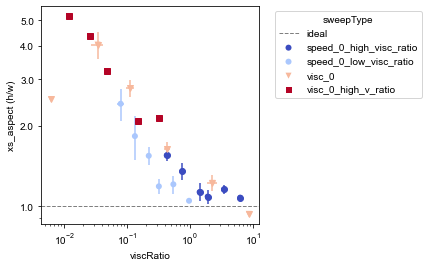

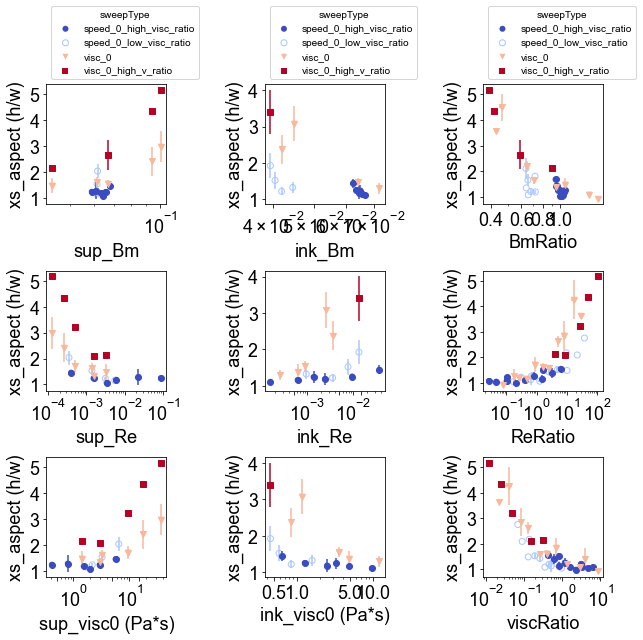

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [58]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0.sort_values(by='sigma')
ss0 = ss0[ss0.xs_aspect_SE<0.5]
ss1 = ss0.copy()
sslap = ss1[ss1.ink_base=='water']
sslap = sslap.sort_values(by='sweepType')
sslap = me.addRatios(sslap, varlist=['Bm'], operator='Ratio')
sslap = sslap[sslap.ink_Bm>10**-3]
# dEst
fig, axs = plt.subplots(3,3, figsize=(9,9))
for j,s1 in enumerate(['Bm', 'Re', 'visc0']):
    if j==2:
        rat = 'viscRatio'
    else:
        rat = s1+'Ratio'
    for i, s in enumerate(['sup_'+s1, 'ink_'+s1,rat]):
        mp.scatterSS(sslap,  s, 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, ax=axs[j][i], units=u,  legend=(j==0))
fig.tight_layout()

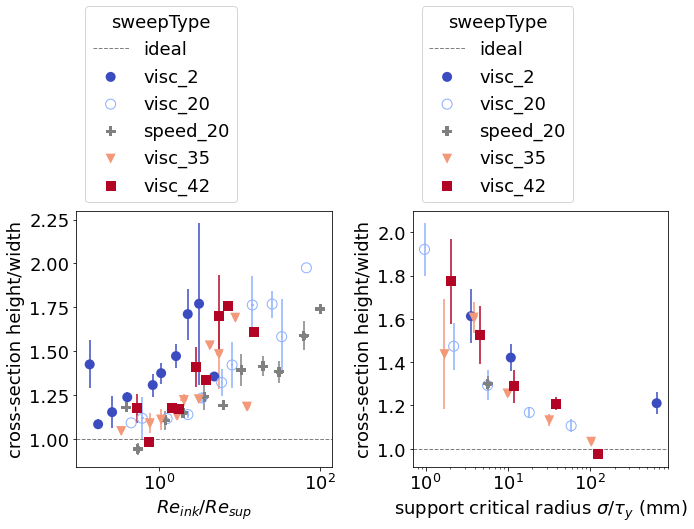

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [60]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0[ss0.xs_area>0.03]
ss0 = ss0.sort_values(by='sigma')
# ss1 = ss0[ss0.ink_type!="PEGDA_40"]
ss0 = ss0[ss0.xs_aspect_SE<0.5]
ss1 = ss0.copy()
# ssca = ss1[ss1.sigma>0]
ssca = ss1.copy()
ssca = ssca[ssca.sigma>0]
ssca = ssca[ssca.sup_visc0>0.03]
fig,axs = plt.subplots(1,2,figsize=(10,10))
ssca.loc[ssca.sweepType.str.contains('speed_20'), 'sweepType']='speed_20'
mp.scatterSS(ssca, 'ReRatio', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1,units=u,  legend=True, ax=axs[0],  markersize=100, fontsize=18)
mp.scatterSS(ssca, 'sup_rPR', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1,units=u,  legend=True, ax=axs[1], markersize=100, fontsize=18)
axs[0].set_xlabel('$Re_{ink}/Re_{sup}$')
axs[0].set_ylabel('cross-section height/width')
axs[1].set_ylabel('cross-section height/width')
axs[1].set_xlabel('support critical radius $\sigma/{\\tau}_y$ (mm)')
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'ppt figures', 'rcrit.svg'), bbox_inches='tight', dpi=300)

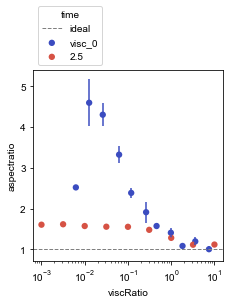

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [403]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0['sup_Ca']=1/ss0['sup_CaInv']
ss0['sweepType']=['speed_'+str(i['sigma']) if ('I_2.75_S_2.75_VI' in i['bn'] or 'I_M6_S_3.00_VI' in i['bn']) else 'visc_'+str(i['sigma']) for j,i in ss0.iterrows()]
ss0 = ss0.sort_values(by='sigma')
ss1 = ss0.copy()
sslap = ss1[ss1.ink_base=='water']
sslap = sslap.sort_values(by='sweepType')
ssca = ss1.copy()
(ssca[ssca.sigma==0]).sup_Ca = [100000 for i in range(len(ssca[ssca.sigma==0]))]
ssmin = ss1[ss1.sigma==20]
ssmin = ssmin.sort_values(by='sweepType')
cmap = cm.get_cmap('coolwarm') 
fig,axs = plt.subplots(1,1,figsize=(3.5, 3.5))
sslap2 = sslap[sslap.sweepType=='visc_0']
fs = 10
ms = 40
mp.scatterSS(sslap2, 'viscRatio', 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs, units=u, legend=True, color=cmap(0), fontsize=fs, markersize=ms)
ss0s = sims.copy()
sslap = sims.copy()
sslap = sslap[(sslap.sigma==0)&(sslap.tau0ink==0)&(sslap.tau0sup==0)]
mp.scatterSS(sslap, 'viscRatio', 'aspectratio', 'time', logx=True, logy=False, gradColor=0, ax=axs, units=usim, legend=True,  fontsize=fs, color=cmap(0.9), markersize=ms)
fig.savefig(os.path.join(cfg.path.fig, 'figures', 'xs_aspect_visc.svg'), bbox_inches='tight', dpi=120)

C:\Users\lmf1\Miniconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


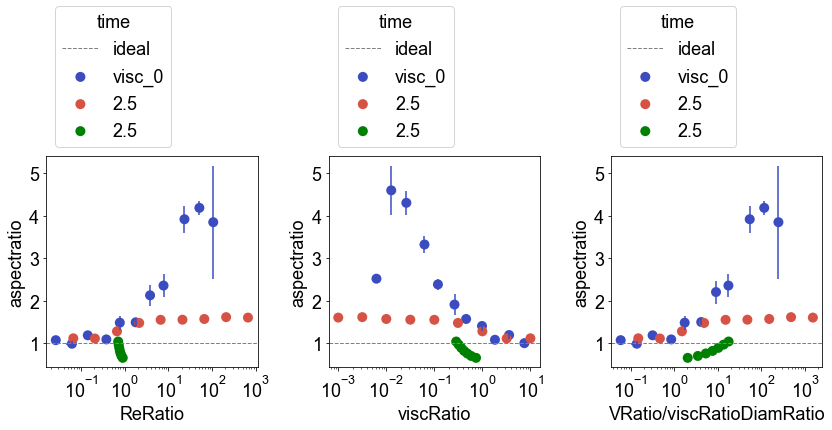

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [53]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0['sup_Ca']=1/ss0['sup_CaInv']
ss0['sweepType']=['speed_'+str(i['sigma']) if ('I_2.75_S_2.75_VI' in i['bn'] or 'I_M6_S_3.00_VI' in i['bn']) else 'visc_'+str(i['sigma']) for j,i in ss0.iterrows()]
ss0 = ss0.sort_values(by='sigma')
ss1 = ss0.copy()
sslap = ss1[ss1.ink_base=='water']
sslap = sslap.sort_values(by='sweepType')
ssca = ss1.copy()
(ssca[ssca.sigma==0]).sup_Ca = [100000 for i in range(len(ssca[ssca.sigma==0]))]
ssmin = ss1[ss1.sigma==20]
ssmin = ssmin.sort_values(by='sweepType')
cmap = cm.get_cmap('coolwarm') 
fig,axs = plt.subplots(1,3,figsize=(12,9))
sslap2 = sslap[sslap.sweepType=='visc_0']
fs = 18
ms = 100
ss0cone = simscone.copy()
sssims = sims.copy()
sssims = sssims[(sssims.sigma==0)&(sssims.tau0ink==0)&(sssims.tau0sup==0)]
ss0cone['VRatio/viscRatioDiamRatio'] = ss0cone['dsup']/ss0cone['dink']*ss0cone['vink']/ss0cone['vsup']/(ss0cone['viscRatio'])
sssims['VRatio/viscRatioDiamRatio'] = sssims['dsup']/sssims['dink']*sssims['vink']/sssims['vsup']/(sssims['viscRatio'])
sslap2['VRatio/viscRatioDiamRatio'] = sslap2['do']/sslap2['di']*sslap2['ink_v']/sslap2['sup_v']/(sslap2['viscRatio'])
for i,s in enumerate(['ReRatio', 'viscRatio', 'VRatio/viscRatioDiamRatio']):
    mp.scatterSS(sslap2, s, 'xs_aspect', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[i], units=u, legend=True, color=cmap(0), fontsize=fs, markersize=ms)
    mp.scatterSS(sssims, s, 'aspectratio', 'time', logx=True, logy=False, gradColor=0, ax=axs[i], units=usim, legend=True,  fontsize=fs, color=cmap(0.9), markersize=ms)
    mp.scatterSS(ss0cone, s, 'aspectratio', 'time', logx=True, logy=False, gradColor=0, ax=axs[i], units=usimcone, legend=True,  fontsize=fs, color='green', markersize=ms)
fig.tight_layout()

# fig.savefig(os.path.join(cfg.path.fig, 'figures', 'xs_aspect_visc.svg'), bbox_inches='tight', dpi=120)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c388220208>)

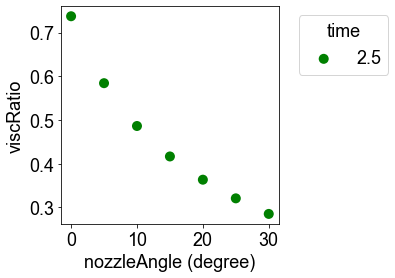

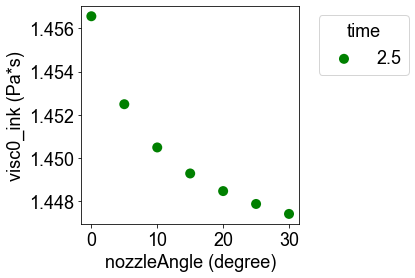

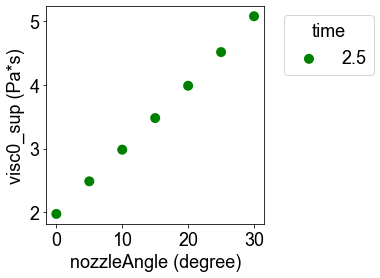

In [57]:
mp.scatterSS(ss0cone, 'nozzleAngle', 'viscRatio', 'time',gradColor=0, units=usimcone, legend=True,  fontsize=fs, color='green', markersize=ms)
mp.scatterSS(ss0cone, 'nozzleAngle', 'visc0_ink', 'time',gradColor=0, units=usimcone, legend=True,  fontsize=fs, color='green', markersize=ms)
mp.scatterSS(ss0cone, 'nozzleAngle', 'visc0_sup', 'time',gradColor=0, units=usimcone, legend=True,  fontsize=fs, color='green', markersize=ms)

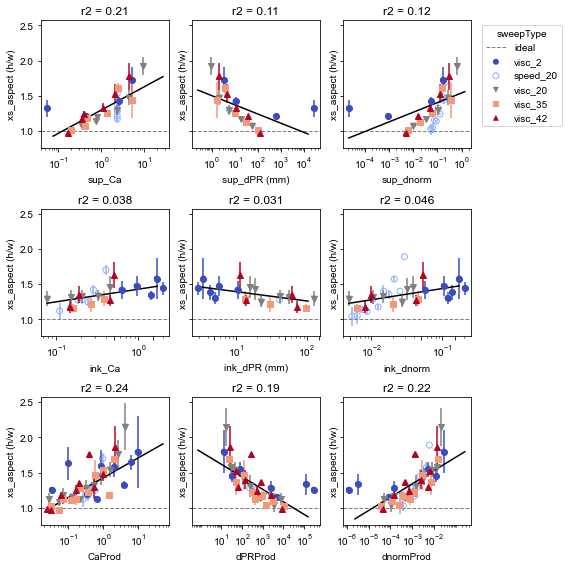

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [10]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0.sort_values(by='sigma')
ss1 = ss0.copy()
ssca = ss1.copy()
ssca = ssca[ssca.sigma>0]
# ssca = ssca[ssca.sup_dPR<10**2]
fig,axs = plt.subplots(3,3,figsize=(8,8), sharey=True)
ssca.loc[ssca.sweepType.str.contains('speed_20'), 'sweepType']='speed_20'
ssca = me.addRatios(ssca, varlist=['Ca', 'dPR', 'dnorm'], operator='Prod')

for i,s1 in enumerate(['sup', 'ink', 'Prod']):
    for j, s2 in enumerate(['Ca', 'dPR', 'dnorm']):
        kwargs = {'logx':True, 'logy':False, 'gradColor':0, 'yideal':1, 'units':u, 'legend':((i==0)&(j==2)), 'legendloc':'right'}
        if i==2:
            xvar = s2+s1
        else:
            xvar = s1+'_'+s2
        mp.scatterSS(ssca, xvar, 'xs_aspect', 'sweepType', ax=axs[i][j], **kwargs)
        ssca[xvar+'_log'] = np.log10(ssca[xvar])
        mp.regressionSS(ssca, xvar+'_log', 'xs_aspect', axs[i][j], log=True)
for i in range(3):
    for j in range(3):
        mp.setSquare(axs[i][j])
fig.tight_layout()
#fig.savefig(os.path.join(cfg.path.fig, 'figures', 'xs_aspect_ca_d.svg'), bbox_inches='tight', dpi=120)

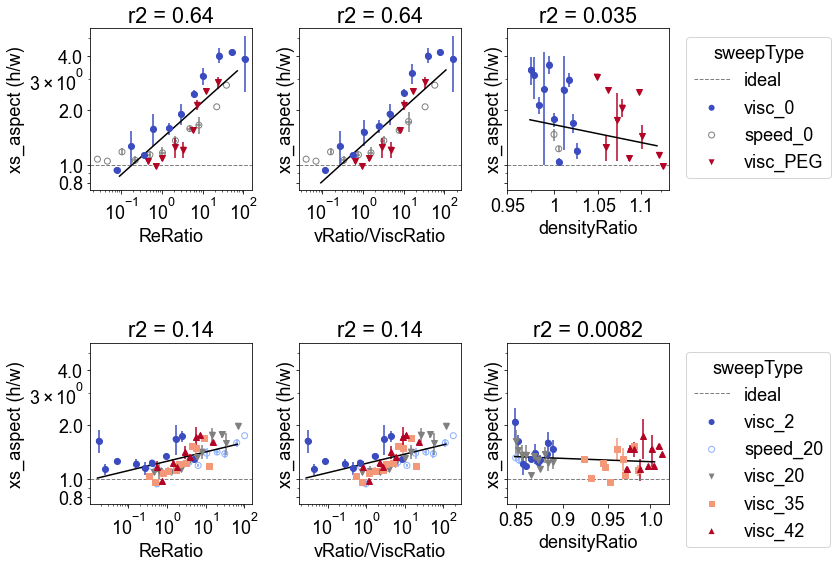

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [35]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0.sort_values(by='sigma')
sslap = ss0.copy()
# sslap = sslap[sslap.sigma==0]
fig,axs = plt.subplots(2,3,figsize=(12, 9), sharey=True)
sslap['vRatio/ViscRatio'] = sslap['vRatio']/sslap['viscRatio']
sslap['densityRatio'] = sslap['ink_density']/sslap['sup_density']
sslap.loc[sslap.sweepType.str.contains('speed_20'), 'sweepType']='speed_20'
sslap.loc[sslap.sweepType.str.contains('speed_0'), 'sweepType']='speed_0'
sslap.loc[sslap.sweepType.str.contains('visc_0'), 'sweepType']='visc_0'
ssca = sslap[sslap.sigma>0]
sslap = sslap[sslap.sigma==0]
for i,s1 in enumerate(['ReRatio', 'vRatio/ViscRatio', 'densityRatio']):
    for j, ssi in enumerate([sslap, ssca]):
        kwargs = {'logx':True, 'logy':True, 'gradColor':0, 'yideal':1, 'units':u, 'legend':(i==2), 'legendloc':'right', 'fontsize':18}
        mp.scatterSS(ssi, s1, 'xs_aspect', 'sweepType', ax=axs[j][i], **kwargs)
        ssi[s1+'_log'] = np.log10(ssi[s1])
        ssi['xs_aspect_log'] = np.log10(ssi['xs_aspect'])
        mp.regressionSS(ssi, s1+'_log', 'xs_aspect_log', axs[j][i])
axs[0][2].set_xticks([0.95, 1, 1.05, 1.1])
axs[0][2].set_xticklabels([0.95, 1, 1.05, 1.1])
for i in range(3):
    for j in range(2):
        mp.setSquare(axs[j][i])

fig.tight_layout()
#fig.savefig(os.path.join(cfg.path.fig, 'figures', 'xs_aspect_ca_d.svg'), bbox_inches='tight', dpi=120)

In [60]:
ss0 = ss.copy()
ss0 = ss0[ss0.ink_days==1]
# ss0 = ss0[ss0.xs_area>0.03]
ss0 = ss0.sort_values(by='sigma')
# ss1 = ss0[ss0.ink_type!="PEGDA_40"]
ss0 = ss0[ss0.xs_aspect_SE<0.5]
ss1 = ss0.copy()
# ssca = ss1[ss1.sigma>0]
ssca1 = ss1.copy()
ssca1 = ssca1[ssca1.sigma>0]
sslap = ss1.copy()
sslap = sslap[sslap.ink_base=='water']
# ssca = ssca[ssca.sup_visc0>0.03]
ssca.loc[ssca.sweepType.str.contains('speed_20'), 'sweepType']='speed_20'
for k, ssca in enumerate([ssca1, sslap]):
    if k==0:
        varlist = ['Ca', 'dPR', 'dnorm', 'We', 'Oh', 'Re', 'Bm', 'visc0']
    else:
        varlist = ['Re', 'Bm', 'visc0']
    for i,s1 in enumerate(['sup', 'ink']):
        ssca = me.addLogs(ssca, [s1+'_'+v for v in varlist])
    for i,s1 in enumerate(['Prod', 'Ratio']):
        ssca = me.addRatios(ssca, varlist=varlist, operator=s1)
        ssca = me.addLogs(ssca, [v+s1 for v in varlist])

    df= []
    for j, s2 in enumerate(varlist):
        reg = rg.regPD(ssca, [f'ink_{s2}_log', f'sup_{s2}_log'], 'xs_aspect')
        reg['title'] = f'{s2}_ink, {s2}_sup'
        reg['ink_coeff'] = reg.pop('b0')
        reg['sup_coeff'] = reg.pop('b1')
        df.append(reg)
        for s1 in ['ink_', 'sup_']:
            reg = rg.regPD(ssca, [f'{s1}{s2}_log'], 'xs_aspect')
            reg['title'] = f'{s2}{s1}'
            reg['coeff'] = reg.pop('b')
            df.append(reg)
        for s1 in ['Prod', 'Ratio']:
            reg = rg.regPD(ssca, [f'{s2}{s1}_log'], 'xs_aspect')
            reg['title'] = f'{s2}{s1}'
            reg['coeff'] = reg.pop('b')
            df.append(reg)
    df = pd.DataFrame(df)
    df = df[['title', 'r2', 'ink_coeff', 'sup_coeff', 'coeff', 'c']]
    display(df)
    print(df.to_latex(index=False, float_format = lambda x: '{:0.2f}'.format(x) if pd.notna(x) else '' ))

,title,r2,ink_coeff,sup_coeff,coeff,c
0,"Ca_ink, Ca_sup",0.258385,0.139959,0.303835,NaN,1.352686
1,Caink_,0.019375,NaN,NaN,0.111717,1.389915
2,Casup_,0.228132,NaN,NaN,0.296074,1.292136
3,CaProd,0.230467,NaN,NaN,0.244150,1.408470
4,CaRatio,0.080233,NaN,NaN,-0.134374,1.259235
5,"dPR_ink, dPR_sup",0.184817,-0.179705,-0.149344,NaN,1.756157
6,dPRink_,0.014121,NaN,NaN,-0.077543,1.444558
7,dPRsup_,0.118499,NaN,NaN,-0.116358,1.476600
8,dPRProd,0.182716,NaN,NaN,-0.152200,1.722609
9,dPRRatio,0.048861,NaN,NaN,0.058426,1.330522


\begin{tabular}{lrrrrr}
\toprule
                title &   r2 &  ink\_coeff &  sup\_coeff &  coeff &    c \\
\midrule
       Ca\_ink, Ca\_sup & 0.26 &       0.14 &       0.30 &        & 1.35 \\
               Caink\_ & 0.02 &            &            &   0.11 & 1.39 \\
               Casup\_ & 0.23 &            &            &   0.30 & 1.29 \\
               CaProd & 0.23 &            &            &   0.24 & 1.41 \\
              CaRatio & 0.08 &            &            &  -0.13 & 1.26 \\
     dPR\_ink, dPR\_sup & 0.18 &      -0.18 &      -0.15 &        & 1.76 \\
              dPRink\_ & 0.01 &            &            &  -0.08 & 1.44 \\
              dPRsup\_ & 0.12 &            &            &  -0.12 & 1.48 \\
              dPRProd & 0.18 &            &            &  -0.15 & 1.72 \\
             dPRRatio & 0.05 &            &            &   0.06 & 1.33 \\
 dnorm\_ink, dnorm\_sup & 0.23 &       0.21 &       0.16 &        & 1.89 \\
            dnormink\_ & 0.03 &            &            & 

,title,r2,ink_coeff,sup_coeff,coeff,c
0,"Re_ink, Re_sup",0.558781,0.821119,-0.967841,NaN,1.171330
1,Reink_,0.138002,NaN,NaN,0.547174,3.198254
2,Resup_,0.271613,NaN,NaN,-0.747475,-0.373094
3,ReProd,0.010230,NaN,NaN,-0.092024,1.246789
4,ReRatio,0.552285,NaN,NaN,0.897175,1.573275
5,"Bm_ink, Bm_sup",0.351496,-0.705508,4.831158,NaN,6.480539
6,Bmink_,0.138056,NaN,NaN,-0.683370,0.809739
7,Bmsup_,0.204450,NaN,NaN,4.726720,7.329730
8,BmProd,0.081979,NaN,NaN,-0.516342,0.430621
9,BmRatio,0.199162,NaN,NaN,-0.811990,1.590695


\begin{tabular}{lrrrrr}
\toprule
                title &   r2 &  ink\_coeff &  sup\_coeff &  coeff &     c \\
\midrule
       Re\_ink, Re\_sup & 0.56 &       0.82 &      -0.97 &        &  1.17 \\
               Reink\_ & 0.14 &            &            &   0.55 &  3.20 \\
               Resup\_ & 0.27 &            &            &  -0.75 & -0.37 \\
               ReProd & 0.01 &            &            &  -0.09 &  1.25 \\
              ReRatio & 0.55 &            &            &   0.90 &  1.57 \\
       Bm\_ink, Bm\_sup & 0.35 &      -0.71 &       4.83 &        &  6.48 \\
               Bmink\_ & 0.14 &            &            &  -0.68 &  0.81 \\
               Bmsup\_ & 0.20 &            &            &   4.73 &  7.33 \\
               BmProd & 0.08 &            &            &  -0.52 &  0.43 \\
              BmRatio & 0.20 &            &            &  -0.81 &  1.59 \\
 visc0\_ink, visc0\_sup & 0.62 &      -1.05 &       1.22 &        &  1.29 \\
            visc0ink\_ & 0.23 &            &  

In [237]:
me.printStillsKeys(ss)

Independents: ['bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_Ca', 'ink_Ca', 'ReProd', 'CaProd', 'sweepType']

Dependents: ['xs_aspect', 'xs_xshift', 'xs_yshift', 'xs_area', 'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'vert_wN', 'vert_hN', 'vert_vN', 'vert_vintegral', 'vert_viN', 'vert_vleak', 'vert_vleakN', 'vert_roughness', 'vert_meanTN', 'vert_stdevTN', 'vert_minmaxTN', 'horiz_segments', 'horiz_maxlen

C:\Users\lmf1\Documents\GitHub\embedded3DPvids\py\metricPlots.py:186: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\lmf1\Documents\GitHub\embedded3DPvids\py\metricPlots.py:186: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\lmf1\Documents\GitHub\embedded3DPvids\py\metricPlots.py:186: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control

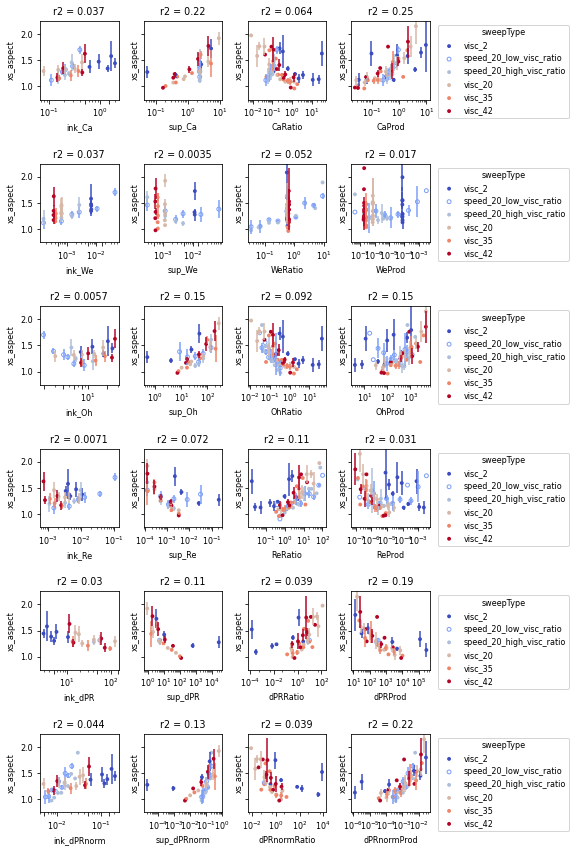

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [349]:
ss1 = ss.copy()
ss1 = ss1[ss1.sigma>0]
# ss1 = mp.tossBigSE(ss1, 'xs_aspect_SE')
ss0 = ss0[ss0.xs_aspect_SE<0.5]
ss1 = ss1.sort_values(by='sigma')
varlist = ['Ca', 'We', 'Oh', 'Re', 'dPR', 'dPRnorm']
ss1['sup_dPRnorm'] = ss1['dEst']/ss1['sup_dPR']
ss1['ink_dPRnorm'] = ss1['dEst']/ss1['ink_dPR']
fig, axs = plt.subplots(len(varlist),4, figsize=(8, 2*len(varlist)), sharey=True)
for j,s in enumerate(varlist):
    if 'sup_'+s+'Inv' in ss1:
        for fl in ['ink', 'sup']:
            ss1[fl+'_'+s] = 1/ss1[fl+'_'+s+'Inv']
    ss1[s+'Ratio'] = ss1['ink_'+s]/ss1['sup_'+s]
    ss1[s+'Prod'] = ss1['ink_'+s]*ss1['sup_'+s]
    for i, xvar in enumerate(['ink_'+s, 'sup_'+s, s+'Ratio', s+'Prod']):
        mp.scatterSS(ss1, xvar, 'xs_aspect', 'sweepType', logx=True, logy=False, ax=axs[j][i], legend=(i==3), legendloc='right', fontsize=8, markersize=15);
        ss1[xvar+'_log'] = np.log10(ss1[xvar])
        reg = rg.regPD(ss1, [xvar+'_log'], 'xs_aspect')
        axs[j][i].set_title('r2 = {:0.2}'.format(reg['r2']))
        axs[j][i].set_ylim([0.75,2.25])
        mp.setSquare(axs[j][i])
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'figures', 'xs_aspect_allvars.svg'), bbox_inches='tight', dpi=120)

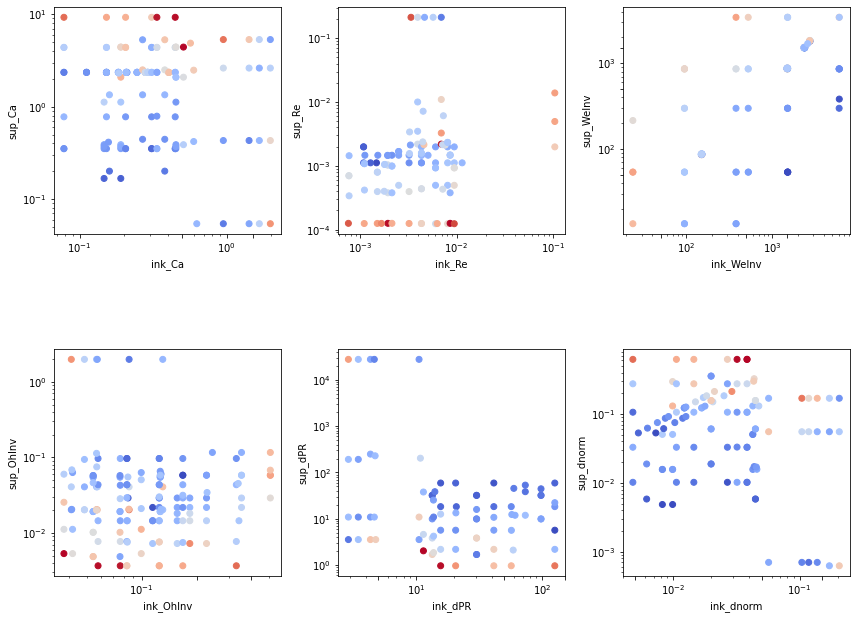

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [382]:
ss1 = ss.copy()
# ss1 = ss1[ss1.ink_days==1]
# ss1 = ss1[ss1.ink_type=='mineral oil']
ss1 = ss1[ss1.sigma>0]
ss1 = ss1[ss1.xs_aspect_SE<0.5]
ss1 = ss1.sort_values(by='sigma')
# ss1 = ss1[ss1.xs_aspect>0.5]
fig, axs = plt.subplots(2,3, figsize=(12,10))
d = 0
mp.scatterSS(ss1, 'ink_Ca', 'sup_Ca', 'xs_aspect', gradColor=1, logx=True, logy=True,  dx=d, dy=d, ax=axs[0,0], cmapname='coolwarm', legend=False)
mp.scatterSS(ss1, 'ink_Re', 'sup_Re', 'xs_aspect', gradColor=1,  logx=True, logy=True,  dx=d, dy=d, ax=axs[0,1], cmapname='coolwarm', legend=False)
mp.scatterSS(ss1, 'ink_WeInv', 'sup_WeInv', 'xs_aspect', gradColor=1,  logx=True, logy=True,  dx=d, dy=d, ax=axs[0,2], cmapname='coolwarm', legend=False)
mp.scatterSS(ss1, 'ink_OhInv', 'sup_OhInv', 'xs_aspect', gradColor=1,  logx=True, logy=True,  dx=d, dy=d, ax=axs[1,0], cmapname='coolwarm', legend=False)
mp.scatterSS(ss1, 'ink_dPR', 'sup_dPR', 'xs_aspect',  gradColor=1, logx=True, logy=True,  dx=d, dy=d, ax=axs[1,1], cmapname='coolwarm', legend=False)
mp.scatterSS(ss1, 'ink_dnorm', 'sup_dnorm', 'xs_aspect', gradColor=1,  logx=True, logy=True,  dx=d, dy=d, ax=axs[1,2], cmapname='coolwarm', legend=False)
fig.tight_layout()

### area

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2d4d57baa88>)

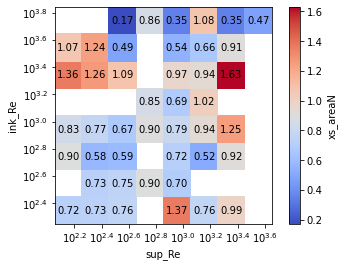

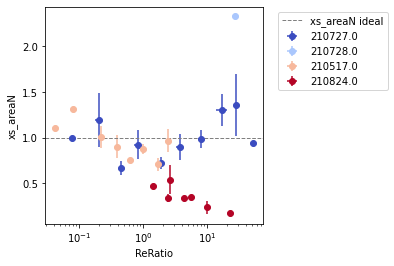

In [170]:
ss1 = ss.copy()
# ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.ink_base=='water']
ss1 = ss1[ss1.sigma==0]
ss1 = ss1[ss1.xs_aspect_SE<1]
ss1 = ss1[ss1.xs_aspect>0.5]
ss1['ReRatio'] = ss1['ink_Re']/ss1['sup_Re']
ss1['vratio'] = ss1['ink_v']/ss1['sup_v']
mp.colorMeshSS(ss1, 'sup_Re', 'ink_Re', 'xs_areaN', logx=True, logy=True,  dx=0.1, dy=0.1, cmapname='coolwarm')
mp.scatterSS(ss1, 'ReRatio', 'xs_areaN', 'date', logx=True, logy=False, gradColor=False,  dx=0.1, dy=1, cmapname='coolwarm', yideal=1)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dddf326d08>)

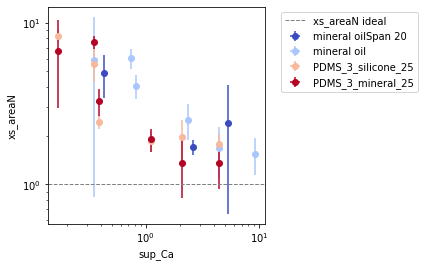

In [886]:
ss1 = ss.copy()
ss1 = ss1[ss1.calibFile]
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.sigma>0]
# ss1 = ss1[ss1.xs_aspect_SE<1]
ss1 = ss1[ss1.xs_aspect>0.5]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
mp.scatterSS(ss1, 'sup_Ca', 'xs_areaN', 'ink_type', logx=True, logy=True, gradColor=False, dx=0, dy=1, cmapname='coolwarm', yideal=1)

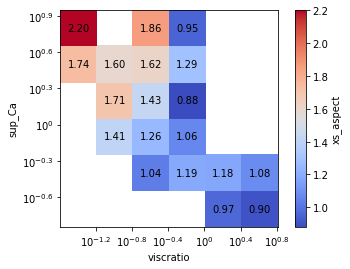

In [890]:
ss1 = ss.copy()
ss1 = ss1[ss1.xs_aspect_SE<1]
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
# ss1 = ss1[ss1.sup_CaInv<12]
ss1 = ss1[ss1.xs_aspect>0.5]
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
# ss1 = ss1[ss1.ink_base=='mineral oil']
# fig,ax = mp.scatterSS(ss1, 'viscratio', 'sup_Ca','xs_aspect',logx=True, logy=True, gradColor=True, dx = 0, dy=0)
fig,ax = mp.colorMeshSS(ss1, 'viscratio', 'sup_Ca', 'xs_aspect', logx=True, logy=True, dx=0.18, dy=0.18)

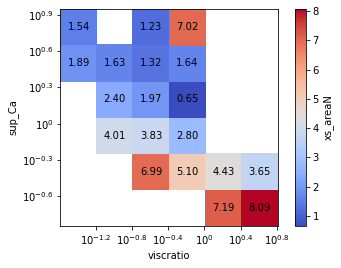

In [891]:
ss1 = ss.copy()
ss1 = ss1[ss1.xs_aspect_SE<1]
ss1 = ss1[ss1.sigma>0]
ss1 = ss1.sort_values(by='sigma')
# ss1 = ss1[ss1.sup_CaInv<12]
ss1 = ss1[ss1.xs_aspect>0.5]
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
# ss1 = ss1[ss1.ink_base=='mineral oil']
# fig,ax = mp.scatterSS(ss1, 'viscratio', 'sup_Ca','xs_aspect',logx=True, logy=True, gradColor=True, dx = 0, dy=0)
fig,ax = mp.colorMeshSS(ss1, 'viscratio', 'sup_Ca', 'xs_areaN', logx=True, logy=True, dx=0.18, dy=0.18)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ddd338bfc8>)

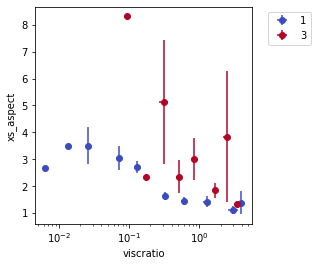

In [706]:
ss1 = ss.copy()
ss1 = ss[ss.calibFile]
ss1.date = [float(i[0:6]) for i in ss1.date]
ss1 = ss1[ss1.date>210516]
ss1 = ss1[ss1.ink_base=='water']
mp.scatterSS(ss1, 'viscratio', 'xs_aspect', 'ink_days', logx=True, logy=False, gradColor=False, dx=0.1, dy=1, cmapname='coolwarm')

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ddcf8c0cc8>)

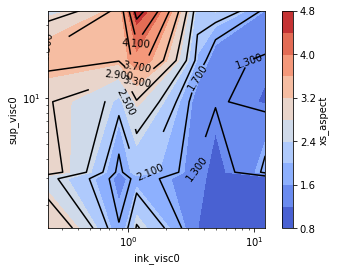

In [741]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.ink_base=='water']
mp.contourSS(ss1, 'ink_visc0', 'sup_visc0', 'xs_aspect', logx=True, logy=True)

### yshift

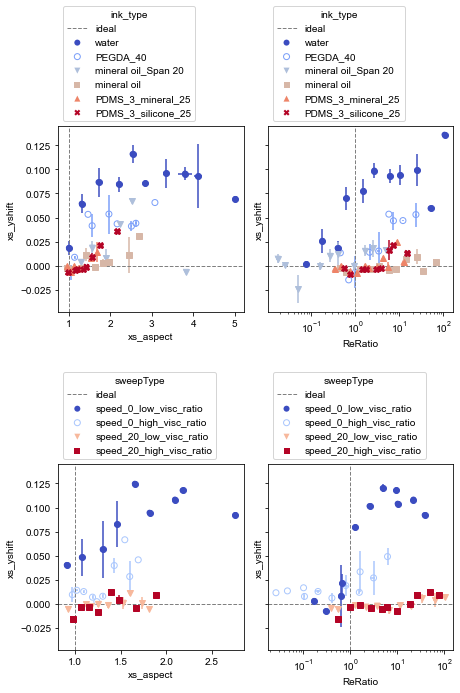

In [407]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_days==1]
# ss1 = ss1[ss1.xs_aspect_SE<0.5]
# ss1 = ss1[ss1.xs_yshift_SE<0.05]
# ss1 = ss1[ss1.xs_areaN_SE<1]
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(2,2,figsize=(6.5, 10), sharey=True)
for i,s in enumerate(['xs_aspect', 'ReRatio']):
    kwargs = {'logx':(i>0), 'logy':False, 'gradColor':False,\
              'dx':0.1, 'dy':1, 'cmapname':'coolwarm', \
              'yideal':0, 'fig':fig}
    if i<2:
        kwargs['xideal']=1
    mp.scatterSS(ss1[ss1.vRatio==1], s, 'xs_yshift', 'ink_type',ax=axs[0][i], **kwargs)
    mp.scatterSS(ss1[ss1.sweepType.str.startswith('speed')], s, 'xs_yshift', 'sweepType',ax=axs[1][i], **kwargs)
for i in range(2):
    for j in range(2):
        mp.setSquare(axs[i][j])
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'figures', 'xs_yshift.svg'), bbox_inches='tight', dpi=120)